TASK 4 RESULTS:
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy: 0.8464285714285713

TASK 5: Logistic Regression Test Accuracy: 0.8333333333333334


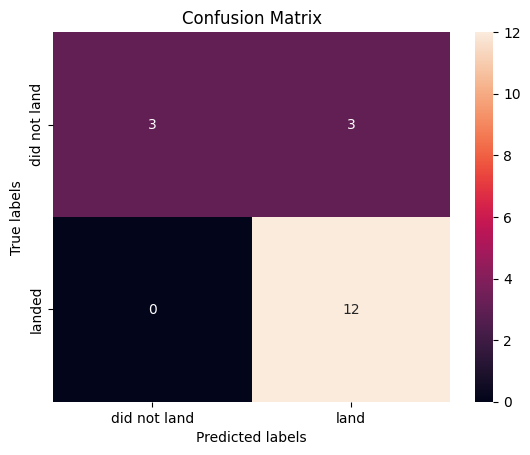


TASK 6 RESULTS:
Best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Best accuracy: 0.8482142857142856

TASK 7: SVM Test Accuracy: 0.8333333333333334


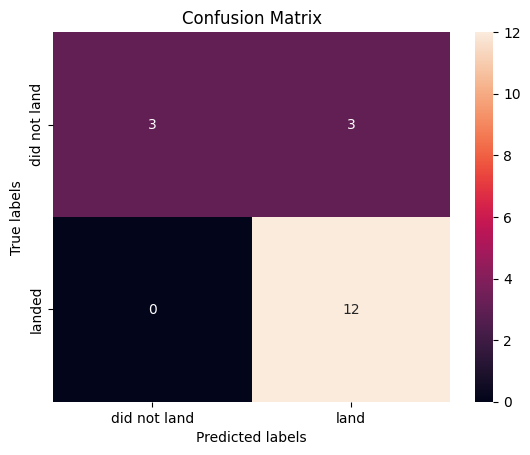


TASK 8 RESULTS:
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best accuracy: 0.8714285714285713

TASK 9: Decision Tree Test Accuracy: 0.7777777777777778


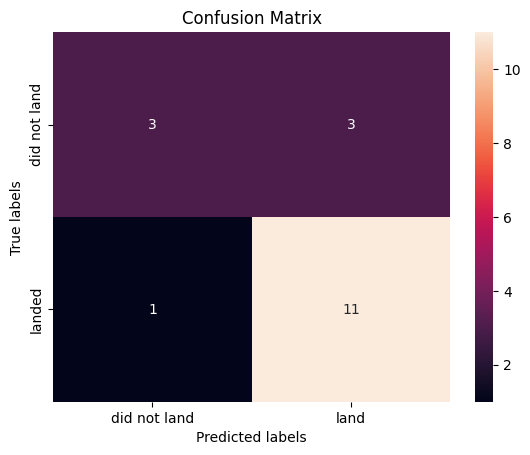


TASK 10 RESULTS:
Best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best accuracy: 0.8482142857142858

TASK 11: KNN Test Accuracy: 0.8333333333333334


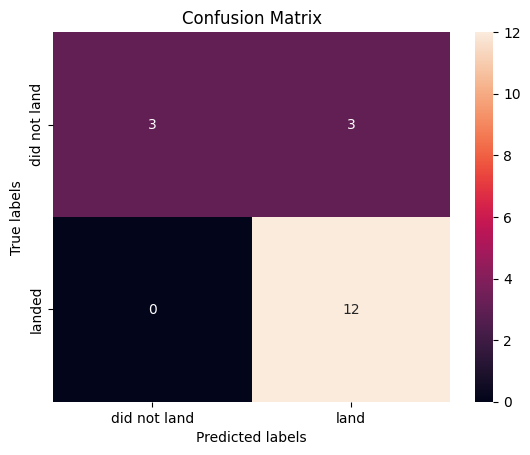

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Define confusion matrix plotting function
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load datasets
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# TASK 1: Create target variable
Y = data['Class'].to_numpy()

# TASK 2: Standardize features
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

# TASK 3: Split data into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# TASK 4: Logistic Regression with GridSearchCV
lr_parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, lr_parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("TASK 4 RESULTS:")
print("Best parameters:", logreg_cv.best_params_)
print("Best accuracy:", logreg_cv.best_score_)

# TASK 5: Evaluate Logistic Regression
lr_score = logreg_cv.score(X_test, Y_test)
print("\nTASK 5: Logistic Regression Test Accuracy:", lr_score)
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)

# TASK 6: SVM with GridSearchCV
svm_parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(svm, svm_parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("\nTASK 6 RESULTS:")
print("Best parameters:", svm_cv.best_params_)
print("Best accuracy:", svm_cv.best_score_)

# TASK 7: Evaluate SVM
svm_score = svm_cv.score(X_test, Y_test)
print("\nTASK 7: SVM Test Accuracy:", svm_score)
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)

# TASK 8: Decision Tree with GridSearchCV
tree_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree = DecisionTreeClassifier(random_state=2)
tree_cv = GridSearchCV(tree, tree_parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("\nTASK 8 RESULTS:")
print("Best parameters:", tree_cv.best_params_)
print("Best accuracy:", tree_cv.best_score_)

# TASK 9: Evaluate Decision Tree
tree_score = tree_cv.score(X_test, Y_test)
print("\nTASK 9: Decision Tree Test Accuracy:", tree_score)
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)

# TASK 10: KNN with GridSearchCV
knn_parameters = {
    'n_neighbors': list(range(1, 11)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("\nTASK 10 RESULTS:")
print("Best parameters:", knn_cv.best_params_)
print("Best accuracy:", knn_cv.best_score_)

# TASK 11: Evaluate KNN
knn_score = knn_cv.score(X_test, Y_test)
print("\nTASK 11: KNN Test Accuracy:", knn_score)
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

# TASK 12: Compare models
results = {
    'Logistic Regression': lr_score,
    'SVM': svm_score,
    'Decision Tree': tree_score,
    'KNN': knn_score
}

best_model = max(results, key=results.get)


In [3]:
print("\nTASK 12: Model Comparison")
for model, score in results.items():
    print(f"{model}: {score:.4f}")
print(f"\nBest performing model: {best_model} with accuracy {results[best_model]:.4f}")


TASK 12: Model Comparison
Logistic Regression: 0.8333
SVM: 0.8333
Decision Tree: 0.7778
KNN: 0.8333

Best performing model: Logistic Regression with accuracy 0.8333


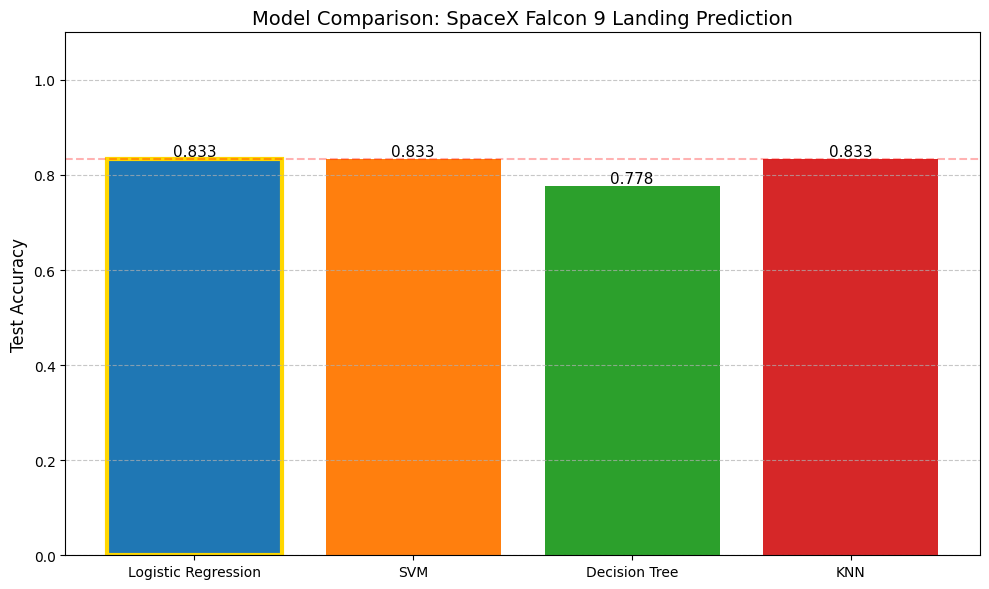


Best performing model: Logistic Regression with accuracy 0.8333


In [4]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Create a bar chart comparing model accuracies
plt.figure(figsize=(10, 6))
models = list(results.keys())
accuracies = list(results.values())

# Create bars with different colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = plt.bar(models, accuracies, color=colors)

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', 
             ha='center', va='bottom', fontsize=11)

# Highlight the best model
best_index = np.argmax(accuracies)
bars[best_index].set_edgecolor('gold')
bars[best_index].set_linewidth(3)

# Add labels and title
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Model Comparison: SpaceX Falcon 9 Landing Prediction', fontsize=14)
plt.ylim(0, 1.1)  # Set y-axis limit to accommodate text
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line at the best accuracy
plt.axhline(y=accuracies[best_index], color='red', linestyle='--', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Print best model information
print(f"\nBest performing model: {best_model} with accuracy {results[best_model]:.4f}")SELECT 
    SUBSTR(Date, 6, 2) AS Month,
    "Landing_Outcome",
    "Booster Version",
    "LaunchSite"
FROM SPACEXTABLE
WHERE SUBSTR(Date, 0, 5) = '2015'
AND "Landing_Outcome" = 'Failure (drone ship)';

In [ ]:
SELECT "Mission_Outcome", COUNT(*) AS Count
FROM SPACEXTABLE
GROUP BY "Mission_Outcome";